In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import pickle
import seaborn as sns
from datetime import datetime, timedelta

In [2]:
below = pd.read_csv("D:\\work\\project 11 业绩快报、预告\\DER_PROB_BELOW_STOCK.csv\\DER_PROB_BELOW_STOCK.csv", encoding="utf-8")
excess = pd.read_csv("D:\\work\\project 11 业绩快报、预告\\der_prob_excess_stock.csv\\der_prob_excess_stock.csv", encoding="utf-8")
below["entrytime"] = pd.to_datetime(below["entrytime"])
below["declare_date"] = pd.to_datetime(below["declare_date"])
below["tradetime"] = below["entrytime"] + timedelta(hours=1)
excess["entrytime"] = pd.to_datetime(excess["entrytime"])
excess["declare_date"] = pd.to_datetime(excess["declare_date"])
excess["tradetime"] = excess["entrytime"] + timedelta(hours=1)

C:\Users\win\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# excess[excess["report_year"] == 2019].iloc[:10, :].to_csv("F:\\超预期信息2019.csv", encoding="GBK", index=False)
# below[below["report_year"] == 2019].iloc[:10, :].to_csv("F:\\低预期信息2019.csv", encoding="GBK", index=False)
below[below["report_year"] == 2019].groupby("information_code").first().reset_index().to_csv("F:\\低预期信息2019.csv", encoding="GBK", index=False)
excess[excess["report_year"] == 2019].groupby("information_code").first().reset_index().to_csv("F:\\超预期信息2019.csv", encoding="GBK", index=False)

### 1. 是否存在一条报告对应多个信息类别

In [3]:
import re
display(below["information_code"].unique())
below["institution"] = np.nan
below.loc[below["information_code"].isin([4, 9]), "institution"] = below[below["information_code"].isin([4, 9])]["information_description"].apply(lambda x: re.search(r'\((.+)\)', x).group(1))
below.loc[below["information_code"].isin([52, 53]), "institution"] = below[below["information_code"].isin([52, 53])]["information_description"].apply(lambda x: x.split("下调")[0])
below.loc[below["information_code"].isin([214]), "institution"] = below[below["information_code"].isin([214])]["information_description"].apply(lambda x: x.split("分析师")[0])
below.loc[below["information_code"].isin([216]), "institution"] = below[below["information_code"].isin([216])]["information_description"].apply(lambda x: x.split("核心研究员")[0])
below.loc[below["information_code"].isin([3008, 3009]), "institution"] = below[below["information_code"].isin([3008, 3009])]["information_description"].apply(lambda x: x[x.find("（")+1:x.rfind("）")])
display(below[below["institution"].isnull()]["information_type"].unique())
display(below[~below["institution"].isnull()]["information_type"].unique())
below["entrydate"] = below["entrytime"].dt.strftime('%Y-%m-%d')
test1 = below[~below["institution"].isnull()]
re1 = test1[test1.duplicated(["stock_name", "institution", "declare_date"],keep=False)].groupby(["declare_date", "stock_code", "institution"])["information_type"].apply(lambda x: tuple(x)).reset_index()
re1 = re1.groupby("information_type")["institution"].count().reset_index()
re1["count"] = re1["information_type"].apply(lambda x: len(x))
display(re1[["information_type", "count", "institution"]])

array([  52,   53,  214,  216,   15,    9,   33,   31,  210,   37,   19,
        224,   35,   11,   13,    4,   21,  212, 3009, 3008], dtype=int64)

array(['一致预期大幅调低', '同时调低评级', '同时调低业绩预测', '业绩预告低于预期（年报）', '季报低于核心研究员预期',
       '一致评级大幅调低', '季报周期低于预期', '年报低于核心研究员预期', '低于预期(前后比较法)', '连续低于预期',
       '一致评级持续调低', '业绩预告低于预期（季报）'], dtype=object)

array(['机构盈利下调评级不变', '机构盈利不变评级下调', '分析师调降（可能低预期）', '核心研究员调降（可能低预期）',
       '核心研究员预期大幅调低', '核心研究员评级大幅调低', '核心研究员评级调降至卖出', '核心研究员评级调降至派发'],
      dtype=object)

,information_type,count,institution
0,"(分析师调降（可能低预期）, 机构盈利下调评级不变)",2,23921
1,"(分析师调降（可能低预期）, 机构盈利下调评级不变, 机构盈利不变评级下调)",3,17
2,"(分析师调降（可能低预期）, 机构盈利下调评级不变, 核心研究员调降（可能低预期）)",3,8
3,"(分析师调降（可能低预期）, 机构盈利下调评级不变, 核心研究员调降（可能低预期）, 核心研...",4,1
4,"(分析师调降（可能低预期）, 机构盈利不变评级下调)",2,1
5,"(分析师调降（可能低预期）, 核心研究员调降（可能低预期）)",2,29
6,"(分析师调降（可能低预期）, 核心研究员调降（可能低预期）, 机构盈利下调评级不变)",3,194
7,"(机构盈利下调评级不变, 分析师调降（可能低预期）)",2,723
8,"(机构盈利下调评级不变, 机构盈利不变评级下调)",2,15
9,"(机构盈利下调评级不变, 核心研究员调降（可能低预期）)",2,175


In [4]:
display(excess["information_code"].unique())
excess["institution"] = np.nan
excess.loc[excess["information_code"].isin([2011, 2012]), "institution"] = excess[excess["information_code"].isin([2011, 2012])]["information_description"].apply(lambda x: x.split("20")[0])
excess.loc[excess["information_code"].isin([213]), "institution"] = excess[excess["information_code"].isin([213])]["information_description"].apply(lambda x: x.split("分析师")[0])
excess.loc[excess["information_code"].isin([215]), "institution"] = excess[excess["information_code"].isin([215])]["information_description"].apply(lambda x: x.split("核心研究员")[0])
display(excess[excess["institution"].isnull()]["information_type"].unique())
display(excess[~excess["institution"].isnull()]["information_type"].unique())
test2 = excess[~excess["institution"].isnull()]
re2 = test2[test2.duplicated(["stock_code", "institution", "declare_date"],keep=False)].groupby(["declare_date", "stock_code", "institution"])["information_type"].apply(lambda x: tuple(x)).reset_index()
re2 = re2.groupby("information_type")["institution"].count().reset_index()
re2["count"] = re2["information_type"].apply(lambda x: len(x))
display(re2[["information_type", "count", "institution"]])

array([2012, 2011,  213,  215,  230,  211,  209,  229], dtype=int64)

array(['本次预告业绩同比增速超年度一致预期业绩同比增速', '业绩预告超预期（季报）', '业绩预告超预期（年报）',
       '本期财报业绩同比增速超年度一致预期业绩同比增速'], dtype=object)

array(['文本摘要超预期', '文本标题超预期', '分析师调升（可能超预期）', '核心研究员调升（可能超预期）'],
      dtype=object)

,information_type,count,institution
0,"(分析师调升（可能超预期）, 分析师调升（可能超预期）)",2,8
1,"(分析师调升（可能超预期）, 文本摘要超预期)",2,5
2,"(分析师调升（可能超预期）, 文本标题超预期)",2,3
3,"(分析师调升（可能超预期）, 核心研究员调升（可能超预期）)",2,1
4,"(文本摘要超预期, 文本摘要超预期)",2,9
5,"(文本摘要超预期, 文本标题超预期)",2,3
6,"(文本摘要超预期, 核心研究员调升（可能超预期）)",2,1
7,"(文本标题超预期, 分析师调升（可能超预期）)",2,1
8,"(文本标题超预期, 文本摘要超预期)",2,2
9,"(文本标题超预期, 文本标题超预期)",2,7


### 2. 除去发预报快报的公司，IC IF CSI REST对应的其他股票

In [59]:
F1 = open("D:\\work\\project 11 业绩快报、预告\\FinPublishDate.pkl", 'rb')
df1 = pickle.load(F1)
F2 = open("D:\\work\\project 11 业绩快报、预告\\FastFinancialReport.pkl", 'rb')
df2 = pickle.load(F2)
F3 = open("D:\\work\\project 11 业绩快报、预告\\ForecastFinancialReport.pkl", 'rb')
df3 = pickle.load(F3)
IC = pd.read_csv("D:\\work\\project 1 lead-lag\\index_comp_SH000905.csv")
IF = pd.read_csv("D:\\work\\project 3 event study\\index_comp_SH000300.csv")
CSI1000 = pd.read_csv("D:\\work\\project 3 event study\\index_comp_SH000852.csv")
REST = pd.read_csv("D:\\work\\project 3 event study\\index_comp_SH000985.csv")

In [60]:
df3 = df3.sort_values(by="截止日")
df3['year'] = df3['截止日'].astype("str").str[:4]
list1 = df3.groupby("year")["截止日"].last().values
# list1 = list1[(list1> 20120000) & (list1 < 20180000)]
list1 = list1[(list1> 20120000) & (list1 < 20190000)]
df3 = df3[df3["截止日"].isin(list1)]
df2 = df2[df2["截止日"].isin(list1)]
df21 = df2.groupby(["截止日"])['StockID'].unique().reset_index()
df21 = df21.rename(columns={"StockID": "快报"})
df31 = df3.groupby(["截止日"])['StockID'].unique().reset_index()
df31 = df31.rename(columns={"StockID": "预告"})

In [61]:
list11 = []
for i in list1:
    if i in IF["Date"]:
        list11.append(i)
    else:
        list11.append(IF["Date"][IF["Date"] < i].max())
IF_list = IF[IF["Date"].isin(list11)].apply(lambda x: x > 0).apply(lambda x: list(IF.columns[x.values])[1:], axis=1).reset_index(drop=True)
df_IF = pd.DataFrame()
df_IF["list"] = IF_list
df_IF["Date"] = list1
df_IF = pd.merge(df_IF, df21, left_on="Date", right_on="截止日")
df_IF = pd.merge(df_IF, df31, left_on="Date", right_on="截止日")
df_IF['IF'] = [list(set(a) - set(b) - set(c)) for a, b, c in zip(df_IF.list, df_IF.快报, df_IF.预告)]
df_IF['len'] = df_IF["IF"].apply(lambda x: len(x))
df_IF['total_len'] = df_IF["list"].apply(lambda x: len(x))
df_IF

,list,Date,截止日_x,快报,截止日_y,预告,IF,len,total_len
0,"[SH600000, SH600005, SH600009, SH600010, SH600...",20121231,20121231,"[SH600000, SH600004, SH600016, SH600018, SH600...",20121231,"[SZ002589, SZ002549, SZ000048, SZ300012, SZ300...","[SZ000157, SH600642, SH601766, SH600703, SH600...",135,300
1,"[SH600000, SH600005, SH600009, SH600010, SH600...",20131231,20131231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20131231,"[SH600182, SZ300152, SZ000594, SZ002591, SZ002...","[SZ000596, SZ000157, SH600332, SH600216, SH601...",135,300
2,"[SH600000, SH600008, SH600009, SH600010, SH600...",20141231,20141231,"[SH600000, SH600009, SH600016, SH600018, SH600...",20141231,"[SZ300294, SZ300042, SZ300310, SZ002384, SZ300...","[SZ000012, SH600332, SH600597, SH600642, SH601...",129,300
3,"[SH600000, SH600005, SH600008, SH600009, SH600...",20151231,20151231,"[SH600000, SH600004, SH600009, SH600015, SH600...",20151231,"[SZ002498, SZ000859, SZ000758, SH600236, SZ300...","[SH600332, SH600597, SH600642, SH601766, SH600...",113,300
4,"[SH600000, SH600005, SH600008, SH600009, SH600...",20161231,20161231,"[SH600000, SH600009, SH600018, SH600030, SH600...",20161231,"[SZ000020, SZ000837, SH600671, SH600078, SZ000...","[SH600332, SH601766, SH600703, SH600372, SH600...",112,300
5,"[SH600000, SH600008, SH600009, SH600010, SH600...",20171231,20171231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20171231,"[SZ000939, SH600960, SZ002471, SZ300333, SZ000...","[SH600332, SH601766, SH601228, SH600233, SH601...",109,300
6,"[SH600000, SH600004, SH600009, SH600010, SH600...",20181231,20181231,"[SH600000, SH600007, SH600009, SH600015, SH600...",20181231,"[SZ300390, SH600248, SZ300498, SZ300596, SZ300...","[SH601228, SH601766, SH600703, SH600233, SH600...",112,300


In [62]:
list11 = []
for i in list1:
    if i in IC["Date"]:
        list11.append(i)
    else:
        list11.append(IC["Date"][IC["Date"] < i].max())
IC_list = IC[IC["Date"].isin(list11)].apply(lambda x: x > 0).apply(lambda x: list(IC.columns[x.values])[1:], axis=1).reset_index(drop=True)
df_IC = pd.DataFrame()
df_IC["list"] = IC_list
df_IC["Date"] = list1
df_IC = pd.merge(df_IC, df21, left_on="Date", right_on="截止日")
df_IC = pd.merge(df_IC, df31, left_on="Date", right_on="截止日")
df_IC['IC'] = [list(set(a) - set(b) - set(c)) for a, b, c in zip(df_IC.list, df_IC.快报, df_IC.预告)]
df_IC['len'] = df_IC["IC"].apply(lambda x: len(x))
df_IC['total_len'] = df_IC["list"].apply(lambda x: len(x))
df_IC

,list,Date,截止日_x,快报,截止日_y,预告,IC,len,total_len
0,"[SH600004, SH600008, SH600017, SH600021, SH600...",20121231,20121231,"[SH600000, SH600004, SH600016, SH600018, SH600...",20121231,"[SZ002589, SZ002549, SZ000048, SZ300012, SZ300...","[SH600287, SZ000042, SH600523, SH600268, SH600...",194,500
1,"[SH600004, SH600006, SH600008, SH600017, SH600...",20131231,20131231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20131231,"[SH600182, SZ300152, SZ000594, SZ002591, SZ002...","[SZ000042, SH600223, SZ000031, SZ000987, SH600...",181,500
2,"[SH600004, SH600006, SH600017, SH600021, SH600...",20141231,20141231,"[SH600000, SH600009, SH600016, SH600018, SH600...",20141231,"[SZ300294, SZ300042, SZ300310, SZ002384, SZ300...","[SZ000596, SZ000031, SH600158, SZ000987, SH600...",184,500
3,"[SH600004, SH600006, SH600017, SH600021, SH600...",20151231,20151231,"[SH600000, SH600004, SH600009, SH600015, SH600...",20151231,"[SZ002498, SZ000859, SZ000758, SH600236, SZ300...","[SZ000596, SZ000012, SH600216, SZ000031, SH600...",154,500
4,"[SH600006, SH600017, SH600022, SH600026, SH600...",20161231,20161231,"[SH600000, SH600009, SH600018, SH600030, SH600...",20161231,"[SZ000020, SZ000837, SH600671, SH600078, SZ000...","[SH603019, SZ000596, SZ000012, SZ000031, SH600...",160,500
5,"[SH600004, SH600006, SH600017, SH600022, SH600...",20171231,20171231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20171231,"[SZ000939, SH600960, SZ002471, SZ300333, SZ000...","[SZ000596, SH600967, SZ000012, SZ000031, SH600...",138,500
6,"[SH600006, SH600008, SH600017, SH600021, SH600...",20181231,20181231,"[SH600000, SH600007, SH600009, SH600015, SH600...",20181231,"[SZ300390, SH600248, SZ300498, SZ300596, SZ300...","[SH600967, SZ000012, SH600597, SZ000078, SH600...",152,500


In [63]:
list11 = []
for i in list1:
    if i in CSI1000["Date"]:
        list11.append(i)
    else:
        list11.append(CSI1000["Date"][CSI1000["Date"] < i].max())
CSI1000_list = CSI1000[CSI1000["Date"].isin(list11)].apply(lambda x: x > 0).apply(lambda x: list(CSI1000.columns[x.values])[1:], axis=1).reset_index(drop=True)
df_CSI1000 = pd.DataFrame()
df_CSI1000["list"] = CSI1000_list
df_CSI1000["Date"] = list1
df_CSI1000 = pd.merge(df_CSI1000, df21, left_on="Date", right_on="截止日")
df_CSI1000 = pd.merge(df_CSI1000, df31, left_on="Date", right_on="截止日")
df_CSI1000['CSI1000'] = [list(set(a) - set(b) - set(c)) for a, b, c in zip(df_CSI1000.list, df_CSI1000.快报, df_CSI1000.预告)]
df_CSI1000['len'] = df_CSI1000["CSI1000"].apply(lambda x: len(x))
df_CSI1000['total_len'] = df_CSI1000["list"].apply(lambda x: len(x))
df_CSI1000

,list,Date,截止日_x,快报,截止日_y,预告,CSI1000,len,total_len
0,"[SH600051, SH600055, SH600057, SH600061, SH600...",20121231,20121231,"[SH600000, SH600004, SH600016, SH600018, SH600...",20121231,"[SZ002589, SZ002549, SZ000048, SZ300012, SZ300...","[SH600287, SH600976, SH600523, SH600461, SZ000...",178,957
1,"[SH600051, SH600055, SH600057, SH600061, SH600...",20131231,20131231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20131231,"[SH600182, SZ300152, SZ000594, SZ002591, SZ002...","[SH600976, SH600523, SH600483, SH600461, SZ000...",180,957
2,"[SH600051, SH600055, SH600057, SH600061, SH600...",20141231,20141231,"[SH600000, SH600009, SH600016, SH600018, SH600...",20141231,"[SZ300294, SZ300042, SZ300310, SZ002384, SZ300...","[SH600976, SH600523, SH600764, SH600461, SZ000...",181,1000
3,"[SH600020, SH600033, SH600052, SH600055, SH600...",20151231,20151231,"[SH600000, SH600004, SH600009, SH600015, SH600...",20151231,"[SZ002498, SZ000859, SZ000758, SH600236, SZ300...","[SH600287, SZ000042, SH600976, SH600555, SH600...",181,1000
4,"[SH600007, SH600012, SH600020, SH600033, SH600...",20161231,20161231,"[SH600000, SH600009, SH600018, SH600030, SH600...",20161231,"[SZ000020, SZ000837, SH600671, SH600078, SZ000...","[SH600287, SZ000042, SH600814, SH600007, SH600...",186,1000
5,"[SH600007, SH600012, SH600020, SH600033, SH600...",20171231,20171231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20171231,"[SZ000939, SH600960, SZ002471, SZ300333, SZ000...","[SH600814, SH603166, SH600523, SH603708, SZ000...",186,1000
6,"[SH600012, SH600020, SH600033, SH600035, SH600...",20181231,20181231,"[SH600000, SH600007, SH600009, SH600015, SH600...",20181231,"[SZ300390, SH600248, SZ300498, SZ300596, SZ300...","[SH600814, SH600523, SH603708, SH600764, SZ000...",220,1000


In [64]:
list11 = []
for i in list1:
    if i in REST["Date"]:
        list11.append(i)
    else:
        list11.append(REST["Date"][REST["Date"] < i].max())
REST_list = REST[REST["Date"].isin(list11)].apply(lambda x: x > 0).apply(lambda x: list(REST.columns[x.values])[1:], axis=1).reset_index(drop=True)
df_REST = pd.DataFrame()
df_REST["list"] = REST_list
df_REST["Date"] = list1
df_REST = pd.merge(df_REST, df21, left_on="Date", right_on="截止日")
df_REST = pd.merge(df_REST, df31, left_on="Date", right_on="截止日")
df_REST['REST'] = [list(set(a) - set(b) - set(c)) for a, b, c in zip(df_REST.list, df_REST.快报, df_REST.预告)]
df_REST['len'] = df_REST["REST"].apply(lambda x: len(x))
df_REST['total_len'] = df_REST["list"].apply(lambda x: len(x))
df_REST

,list,Date,截止日_x,快报,截止日_y,预告,REST,len,total_len
0,"[SH600006, SH600007, SH600012, SH600018, SH600...",20121231,20121231,"[SH600000, SH600004, SH600016, SH600018, SH600...",20121231,"[SZ002589, SZ002549, SZ000048, SZ300012, SZ300...","[SH600749, SH600814, SH600967, SZ000596, SH600...",108,551
1,"[SH600007, SH600012, SH600018, SH600020, SH600...",20131231,20131231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20131231,"[SH600182, SZ300152, SZ000594, SZ002591, SZ002...","[SH600749, SH600960, SH600814, SH600597, SZ000...",140,619
2,"[SH600005, SH600007, SH600012, SH600020, SH600...",20141231,20141231,"[SH600000, SH600009, SH600016, SH600018, SH600...",20141231,"[SZ300294, SZ300042, SZ300310, SZ002384, SZ300...","[SZ000042, SH600814, SH600223, SZ000539, SZ000...",113,613
3,"[SH600007, SH600012, SH600022, SH600035, SH600...",20151231,20151231,"[SH600000, SH600004, SH600009, SH600015, SH600...",20151231,"[SZ002498, SZ000859, SZ000758, SH600236, SZ300...","[SH600814, SH600007, SZ000695, SZ000605, SH603...",111,726
4,"[SH600004, SH600011, SH600027, SH600051, SH600...",20161231,20161231,"[SH600000, SH600009, SH600018, SH600030, SH600...",20161231,"[SZ000020, SZ000837, SH600671, SH600078, SZ000...","[SH600268, SH600223, SH600461, SZ000695, SH600...",185,1007
5,"[SH600027, SH600051, SH600052, SH600055, SH600...",20171231,20171231,"[SH600000, SH600004, SH600007, SH600009, SH600...",20171231,"[SZ000939, SH600960, SZ002471, SZ300333, SZ000...","[SH600976, SH603041, SH600268, SH600223, SH603...",286,1428
6,"[SH600007, SH600051, SH600052, SH600070, SH600...",20181231,20181231,"[SH600000, SH600007, SH600009, SH600015, SH600...",20181231,"[SZ300390, SH600248, SZ300498, SZ300596, SZ300...","[SH600976, SH603933, SH600223, SH603488, SH603...",365,1635


In [65]:
below["StockID"] = np.nan
below.loc[below["stock_code"] >= 600000, 'StockID'] = "SH" + below.loc[below["stock_code"] >= 600000, 'stock_code'].astype(str)
below.loc[below["stock_code"] < 600000, 'StockID'] = "SZ" + below.loc[below["stock_code"] < 600000, 'stock_code'].\
astype(str).apply(lambda x: x.zfill(6))
excess["StockID"] = np.nan
excess.loc[excess["stock_code"] >= 600000, 'StockID'] = "SH" + excess.loc[excess["stock_code"] >= 600000, 'stock_code'].astype(str)
excess.loc[excess["stock_code"] < 600000, 'StockID'] = "SZ" + excess.loc[excess["stock_code"] < 600000, 'stock_code'].\
astype(str).apply(lambda x: x.zfill(6))

### 3. 年报发行前一个月的超预期低预期信息，对年报发行前三天alpha变化的解释能力

In [66]:
stocks = pd.read_csv("E:\\all_stock_daily.csv", encoding="GBK").iloc[:, 1:]
alpha = pd.read_csv("E:\\new_beta1.csv", encoding="GBK").iloc[:, 1:]
alpha["stock_return1"] = alpha['close']/alpha['open'] - 1
df1 = df1[df1["reportPeriod"].isin(list1)]
trade_date = np.sort(stocks["Date"].unique())
trade_date

array([20100104, 20100105, 20100106, ..., 20191031, 20191101, 20191104],
      dtype=int64)

In [13]:
def func1(x):
    return trade_date[(trade_date >= x.iloc[1]) & (trade_date < x.iloc[0])] 
def func11(x):
    return trade_date[(trade_date >= x.iloc[1]) & (trade_date <= x.iloc[0])] 

def func2(m, below, nn, index, name):
    index['year'] = [2012, 2013, 2014, 2015, 2016, 2017]
    list2 = [2012, 2013, 2014, 2015, 2016, 2017]
    info = below[below["report_year"].isin(list2)]
    b1 = pd.merge(info, index[["year", name]], left_on='report_year', right_on="year")
    b1 = b1[b1.apply(lambda x: x["StockID"] in x[name], axis=1)]
    b1["Date"] = b1["declare_date"].dt.strftime("%Y%m%d").astype("int")
    df1["Date"] = np.nan
    df1["Date"] = df1["AnnDate"].apply(lambda x: trade_date[trade_date >= x].min())
    df1["year"] = pd.to_datetime(df1["reportPeriod"].astype(str)).dt.year
    df1["past_3_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - 3])
    df1["future_20_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] + 20])
    df1["t1"] = df1.loc[:, ["future_20_days", "past_3_days"]].apply(func11, axis=1)
    df1["past_m_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - m])
    df1["t2"] = df1.loc[:, ["past_3_days", "past_m_days"]].apply(func1, axis=1)
    re1 = pd.merge(b1, df1[["StockID", "year", "t1", "t2"]], on=["year", "StockID"])
    re1 = re1[re1.apply(lambda x: x["Date"] in x["t2"], axis=1)]
    kk = re1[re1.duplicated(["stock_name", "institution", "declare_date"],keep=False)].groupby(["declare_date", "stock_code", "institution"])["information_type"].apply(lambda x: tuple(x)).reset_index()
    if len(kk) != 0:
        kk = kk.groupby("information_type")["institution"].count().reset_index()
        kk["count"] = kk["information_type"].apply(lambda x: len(x))
        display(kk[["information_type", "count", "institution"]])

    from matplotlib.ticker import FuncFormatter
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    mpl.rcParams['axes.unicode_minus'] = False
    
    fig, ax1 = plt.subplots(figsize=(15, 6))
    width = 0.45
    db1 = re1.groupby("report_year")["stock_name"].unique().apply(lambda x: len(x)).reset_index()
    db2 = pd.merge(db1, index[["year", "len"]], left_on="report_year", right_on="year")
    bars1 = ax1.bar(np.arange(len(db2))-width/2, db2['stock_name'], width = width, label='其中发布可能' + nn + '信息的公司数目')
    bars2 = ax1.bar(np.arange(len(db2))+width/2, db2["len"], color='salmon', alpha=1, width=width, label=name + '中未发布预报、快报的公司数目')
    plt.xticks(np.arange(len(db2)), db1['report_year'])
    fig.legend(loc=1, bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
    for bar in bars1:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.15, yval + .3, yval)
    for bar in bars2:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.15, yval + .3, yval)
    plt.title(name + "中未发布预报、快报公司，发布" + nn + "信息情况统计")
    plt.show()
    
    fig, ax = plt.subplots(figsize=(15, 6))
    ll = len(re1["information_type"].unique())
    bars = plt.bar(np.arange(ll), re1.groupby("information_type")["information_code"].count().values)
    plt.xticks(np.arange(ll), re1.groupby("information_type")["information_code"].count().index.values)
    plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
    plt.title("年报发行前%d天-前4天内，"% (m) + name + "未发预报、快报公司可能" + nn + "信息发布情况")
#     formatter = FuncFormatter(lambda y, pos: "%d%%" % (y))
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x()+0.35, yval + .3, yval)
#     ax.yaxis.set_major_formatter(formatter)
    plt.show()
    
    dff = pd.DataFrame()
    f1 = []
    f2 = []
    f3 = []
    for i in re1["information_type"].unique():
        try1 = re1[re1["information_type"] == i].reset_index(drop=True)
        m = 0
        df = pd.DataFrame()
        for j in range(len(try1)):
            data1 = alpha[alpha["Symbol"] == try1.loc[j, "StockID"]][["Date", "alpha"]]
            tp = pd.DataFrame(try1.loc[j, "t1"], columns=["Date"])
            tp = pd.DataFrame(pd.merge(tp, data1, left_on="Date", right_on="Date", how="left")["alpha"])
            tp = tp.rename(columns={'alpha': m})
            df = pd.concat([df, tp], axis=1)
            m = m + 1
        df = df.dropna(axis=1)
        CAR = np.cumsum(df.mean(axis=1)) * 10000
        f1.append(CAR[3])
        f2.append(CAR[2])
        f3.append(m)
    dff["低预期信息类型"] = re1["information_type"].unique()
    dff["信息数量"] = f3
    dff["年报发行前3天累计alpha"] = f2
    dff["年报发行前3天（包括当日）累计alpha"] = f1
    dff = dff.dropna(axis=0)
    dff["年报发行前3天累计alpha"] = dff["年报发行前3天累计alpha"].astype("int")
    dff["年报发行前3天（包括当日）累计alpha"] = dff["年报发行前3天（包括当日）累计alpha"].astype("int")
    return dff, re1

# for k in [13, 23, 33, 43, 53, 63]:
#     dff, re1 = func2(k, below, "低预期", df_IF, "IF")
#     display(dff)
# for k in [13, 23, 33, 43, 53, 63]:
#     dff, re1 = func2(k, below, "低预期", df_IC, "IC")
#     display(dff)
# for k in [13, 23, 33, 43, 53, 63]:
#     dff, re1 = func2(k, below, "低预期", df_CSI1000, "CSI1000")
#     display(dff)
# for k in [13, 23, 33, 43, 53, 63]:
#     dff, re1 = func2(k, below, "低预期", df_REST, "REST")
#     display(dff)

,information_type,count,institution
0,"(分析师调降（可能低预期）, 机构盈利下调评级不变)",2,8
1,"(核心研究员调降（可能低预期）, 机构盈利下调评级不变)",2,5


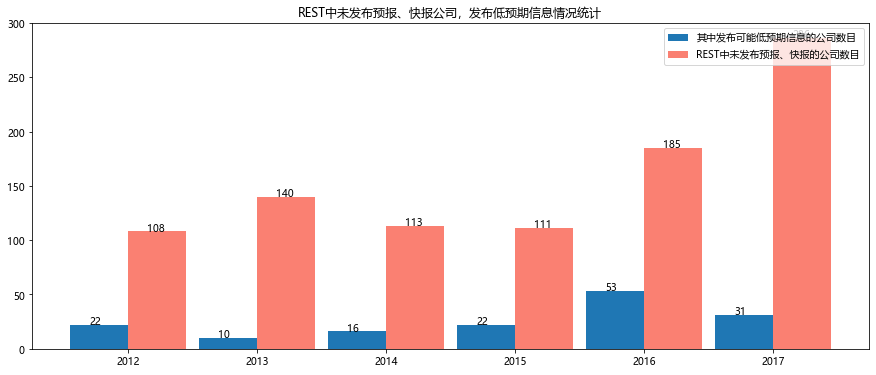

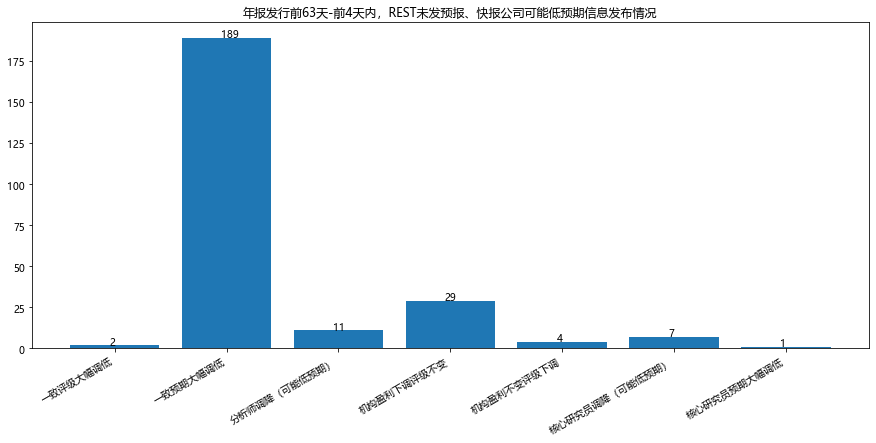

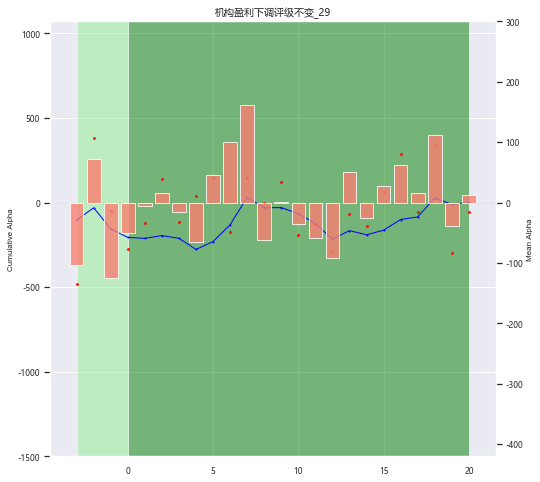

In [17]:
dff, re1 = func2(63, below, "低预期", df_REST, "REST")
def kk(code):
    try1 = re1[re1["information_type"] == code].reset_index(drop=True)
    m = 0
    df = pd.DataFrame()
    for j in range(len(try1)):
        data1 = alpha[alpha["Symbol"] == try1.loc[j, "StockID"]][["Date", "alpha"]]
        tp = pd.DataFrame(try1.loc[j, "t1"], columns=["Date"])
        tp = pd.DataFrame(pd.merge(tp, data1, left_on="Date", right_on="Date", how="left")["alpha"])
        tp = tp.rename(columns={'alpha': m})
        df = pd.concat([df, tp], axis=1)
        m = m + 1
    df = df.dropna(axis=1)
    CAR = np.cumsum(df.mean(axis=1)) * 10000
    T = df.mean(axis=1) * 10000
    M = df.median(axis=1) * 10000
    
    from pandas.plotting import register_matplotlib_converters
    register_matplotlib_converters()
    def align_yaxis_np(ax1, ax2):
        """Align zeros of the two axes, zooming them out by same ratio"""
        axes = np.array([ax1, ax2])
        extrema = np.array([ax.get_ylim() for ax in axes])
        tops = extrema[:, 1] / (extrema[:, 1] - extrema[:, 0])
        # Ensure that plots (intervals) are ordered bottom to top:
        if tops[0] > tops[1]:
            axes, extrema, tops = [a[::-1] for a in (axes, extrema, tops)]
        
        # How much would the plot overflow if we kept current zoom levels?
        tot_span = tops[1] + 1 - tops[0]
        
        extrema[0, 1] = extrema[0, 0] + tot_span * (extrema[0, 1] - extrema[0, 0])
        extrema[1, 0] = extrema[1, 1] + tot_span * (extrema[1, 0] - extrema[1, 1])
        [axes[i].set_ylim(*extrema[i]) for i in range(2)]
    
    x = range(-3, 21)
    sns.set()
    fig, ax1 = plt.subplots(figsize=(8, 8))
    ax1.axvspan(-3, 0, facecolor='lightgreen', alpha=0.5)
    ax1.axvspan(0, 20, facecolor='green', alpha=0.5)
    ax1.set_ylabel('Cumulative Alpha', fontname="Arial", fontsize=8)
    ax1.plot(x, CAR, marker='.', color='blue', alpha=1, linewidth=1, markersize=2)
    ax1.tick_params('y')
    ax1.tick_params(labelsize=8)
    ax1.axhline(y=0, color='salmon', linestyle=(0, (1, 1)), alpha=0.6, linewidth=1)
    ax2 = ax1.twinx()
    ax2.set_ylabel('Mean Alpha', fontname="Arial", fontsize=8)
    ax2.bar(x, T, color='salmon', alpha=0.8)
    ax2.scatter(x, M, color='red', alpha=0.8, s=4)
    ax2.tick_params('y')
    ax2.tick_params(labelsize=8)
    from pylab import mpl
    mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    mpl.rcParams['axes.unicode_minus'] = False
    plt.title(code + "_" + str(m), fontsize=10)
    ax1.grid(True)
    ax2.grid(None)
    ax1.set_ylim(-1500, 1000)
    ax2.set_ylim(-400, 300)
    align_yaxis_np(ax1, ax2)


kk('机构盈利下调评级不变')

In [79]:
def func1(x):
    return trade_date[(trade_date >= x.iloc[1]) & (trade_date < x.iloc[0])] 
def func11(x):
    return trade_date[(trade_date >= x.iloc[1]) & (trade_date <= x.iloc[0])] 
def func12(x):
    return trade_date[(trade_date > x.iloc[1]) & (trade_date <= x.iloc[0])] 
from scipy import stats

m = 43
below = below
nn = "低预期"
index = df_IF
name = "IF"
n = 4

index['year'] = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
list2 = [2012, 2013, 2014, 2015, 2016, 2017, 2018]
info = below[below["report_year"].isin(list2)]
b1 = pd.merge(info, index[["year", name]], left_on='report_year', right_on="year")
b1 = b1[b1.apply(lambda x: x["StockID"] in x[name], axis=1)]
b1["Date"] = b1["declare_date"].dt.strftime("%Y%m%d").astype("int")
df1["Date"] = np.nan
df1["Date"] = df1["AnnDate"].apply(lambda x: trade_date[trade_date >= x].min())
df1["year"] = pd.to_datetime(df1["reportPeriod"].astype(str)).dt.year
df1["past_3_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - 3])
df1["past_m_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - m])
df1["past_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - 80])
df1["past_n_days"] = df1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] - 80 - n])
df1["t2"] = df1.loc[:, ["past_3_days", "past_m_days"]].apply(func1, axis=1)
df1["t3"] = df1.loc[:, ["past_days", "past_n_days"]].apply(func12, axis=1)
re1 = pd.merge(b1, df1[["StockID", "year", "t2", "t3"]], on=["year", "StockID"])
re1 = re1[re1.apply(lambda x: x["Date"] in x["t2"], axis=1)]
re1["future_n_days"] = re1["Date"].apply(lambda x: trade_date[np.where(trade_date == x)[0][0] + n])
re1["t1"] = re1.loc[:, ["future_n_days", "Date"]].apply(func12, axis=1)


kk = re1[re1.duplicated(["stock_name", "institution", "declare_date"],keep=False)].groupby(["declare_date", "stock_code", "institution"])["information_type"].apply(lambda x: tuple(x)).reset_index()
if len(kk) != 0:
    kk = kk.groupby("information_type")["institution"].count().reset_index()
    kk["count"] = kk["information_type"].apply(lambda x: len(x))
    display(kk[["information_type", "count", "institution"]])

    
dff = pd.DataFrame()
f1 = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
for i in re1["information_type"].unique():
    try1 = re1[re1["information_type"] == i].reset_index(drop=True)
    df = pd.DataFrame()
    fd = pd.DataFrame()
    m = 0
    for j in range(len(try1)):
        data1 = alpha[alpha["Symbol"] == try1.loc[j, "StockID"]][["Date", "stock_return1", 'stock_return']]
        tp = pd.DataFrame(try1.loc[j, "t1"], columns=["Date"])
        tp = pd.DataFrame(pd.merge(tp, data1, left_on="Date", right_on="Date", how="left")[['stock_return']]).reset_index(drop=True)
        tp = tp.rename(columns={'stock_return': m})
        df = pd.concat([df, tp], axis=1)
        tp1 = pd.DataFrame(try1.loc[j, "t3"], columns=["Date"])
        tp1 = pd.DataFrame(pd.merge(tp1, data1, left_on="Date", right_on="Date", how="left")[['stock_return']]).reset_index(drop=True)
        tp1 = tp1.rename(columns={'stock_return': m})
        fd = pd.concat([fd, tp1], axis=1)
        m = m + 1
    df = df.dropna(axis=1)
    fd = fd.dropna(axis=1)
    pos = []
    neg = []
    zero = []
    for k in range(len(df)):
        pos.append(str(int(sum(df.iloc[k, :] > 0)/df.shape[1]*100)) + '%')
        neg.append(str(int(sum(df.iloc[k, :] < 0)/df.shape[1]*100)) + '%')
        zero.append(str(int(sum(df.iloc[k, :] == 0)/df.shape[1]*100)) + '%')
    f1.append(pos)
    f2.append(df.shape[1])
    f3.append(neg)
    f4.append(df.std(axis = 0).mean())
    f5.append(fd.std(axis = 0).mean())
    f6.append(zero)

str1 = "信息发布后" + str(n) + "天正收益率占比"
str2 = "信息发布后" + str(n) + "天负收益率占比"
dff["信息发布后零收益率占比"] = f6
dff["低预期信息类型"] = re1["information_type"].unique()
dff["信息数量"] = f2
dff[str1] = f1
dff[str2] = f3
dff["选择阶段收益率波动率"] = f4
dff["平时收益率波动率"] = f5
dff = dff.dropna(axis=0)
for col in ["选择阶段收益率波动率", "平时收益率波动率"]:
    dff[col] = dff[col].apply(lambda x: '%.1f%%'%(100*x))
display(dff)
display(dff.iloc[:, 1:])

,information_type,count,institution
0,"(分析师调降（可能低预期）, 机构盈利下调评级不变)",2,62
1,"(分析师调降（可能低预期）, 机构盈利下调评级不变, 机构盈利不变评级下调)",3,1
2,"(机构盈利下调评级不变, 分析师调降（可能低预期）)",2,1
3,"(机构盈利下调评级不变, 机构盈利不变评级下调)",2,1
4,"(机构盈利下调评级不变, 核心研究员调降（可能低预期）)",2,1
5,"(核心研究员调降（可能低预期）, 机构盈利下调评级不变)",2,34
6,"(核心研究员调降（可能低预期）, 核心研究员评级调降至卖出, 机构盈利下调评级不变)",3,1


,信息发布后零收益率占比,低预期信息类型,信息数量,信息发布后4天正收益率占比,信息发布后4天负收益率占比,选择阶段收益率波动率,平时收益率波动率
0,"[1%, 1%, 5%, 1%]",分析师调降（可能低预期）,72,"[52%, 56%, 36%, 44%]","[45%, 41%, 58%, 54%]",2.2%,2.0%
1,"[2%, 1%, 3%, 2%]",机构盈利下调评级不变,219,"[47%, 49%, 45%, 48%]","[49%, 48%, 50%, 48%]",2.2%,1.9%
2,"[2%, 2%, 0%, 2%]",核心研究员调降（可能低预期）,41,"[51%, 43%, 68%, 51%]","[46%, 53%, 31%, 46%]",2.4%,1.8%
3,"[3%, 5%, 3%, 4%]",一致预期大幅调低,211,"[45%, 46%, 53%, 54%]","[50%, 47%, 43%, 41%]",2.3%,2.1%
4,"[11%, 0%, 0%, 0%]",一致评级大幅调低,9,"[55%, 44%, 44%, 66%]","[33%, 55%, 55%, 33%]",2.2%,2.1%
5,"[0%, 0%, 25%, 0%]",机构盈利不变评级下调,4,"[25%, 25%, 25%, 50%]","[75%, 75%, 50%, 50%]",1.6%,1.7%
6,"[0%, 0%, 0%, 0%]",核心研究员评级调降至卖出,2,"[100%, 50%, 100%, 100%]","[0%, 50%, 0%, 0%]",0.8%,1.2%
7,"[0%, 0%, 0%, 0%]",业绩预告低于预期（年报）,1,"[100%, 100%, 0%, 0%]","[0%, 0%, 100%, 100%]",1.8%,0.8%


,低预期信息类型,信息数量,信息发布后4天正收益率占比,信息发布后4天负收益率占比,选择阶段收益率波动率,平时收益率波动率
0,分析师调降（可能低预期）,72,"[52%, 56%, 36%, 44%]","[45%, 41%, 58%, 54%]",2.2%,2.0%
1,机构盈利下调评级不变,219,"[47%, 49%, 45%, 48%]","[49%, 48%, 50%, 48%]",2.2%,1.9%
2,核心研究员调降（可能低预期）,41,"[51%, 43%, 68%, 51%]","[46%, 53%, 31%, 46%]",2.4%,1.8%
3,一致预期大幅调低,211,"[45%, 46%, 53%, 54%]","[50%, 47%, 43%, 41%]",2.3%,2.1%
4,一致评级大幅调低,9,"[55%, 44%, 44%, 66%]","[33%, 55%, 55%, 33%]",2.2%,2.1%
5,机构盈利不变评级下调,4,"[25%, 25%, 25%, 50%]","[75%, 75%, 50%, 50%]",1.6%,1.7%
6,核心研究员评级调降至卖出,2,"[100%, 50%, 100%, 100%]","[0%, 50%, 0%, 0%]",0.8%,1.2%
7,业绩预告低于预期（年报）,1,"[100%, 100%, 0%, 0%]","[0%, 0%, 100%, 100%]",1.8%,0.8%


In [111]:
# analyst
below = below[(below["report_year"] >= 2016) & (below["information_code"] == 214)]
excess = excess[(excess["report_year"] >= 2016) & (excess["information_code"] == 213)]
excess["analyst"] = excess["information_description"].apply(lambda x: x.split("分析师")[0])
analyst_list = excess.groupby("report_year")["analyst"].unique().reset_index()
analyst_list["sum"] = analyst_list["analyst"].str.len()
excess = pd.merge(excess, analyst_list[["report_year", "sum"]], on="report_year")
c1 = excess.groupby(["report_year", "stock_code"])["information_type"].count().reset_index()
c1 = c1.rename(columns={"information_type": "count"})
excess = pd.merge(excess, c1, on=["report_year", "stock_code"])
below["analyst"] = below["information_description"].apply(lambda x: x.split("分析师")[0])
analyst_list1 = below.groupby("report_year")["analyst"].unique().reset_index()
analyst_list1["sum"] = analyst_list1["analyst"].str.len()
below = pd.merge(below, analyst_list1[["report_year", "sum"]], on="report_year")
c2 = below.groupby(["report_year", "stock_code"])["information_type"].count().reset_index()
c2 = c2.rename(columns={"information_type": "count"})
below = pd.merge(below, c2, on=["report_year", "stock_code"])

In [120]:
below["prob"] = below["count"] / below["sum"]
excess["prob"] = excess["count"] / excess["sum"]
display(below.groupby(["report_year", "stock_name"])["count", "sum", "prob"].first())
display(excess.groupby(["report_year", "stock_name"])["count", "sum", "prob"].first())
test1 = below.groupby(["report_year", "stock_name"])["count", "sum", "prob"].first().reset_index()
test2 = excess.groupby(["report_year", "stock_name"])["count", "sum", "prob"].first().reset_index()
display(test1[test1["report_year"] == 2016]["prob"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])["50%"])
display(test2[test2["report_year"] == 2016]["prob"].describe([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])["50%"])

count  sum      prob
report_year stock_name                      
2016        *ST保千           1   57  0.017544
            *ST凯迪           1   57  0.017544
            *ST因美           1   57  0.017544
            *ST大唐           1   57  0.017544
            ST中南            2   57  0.035088
...                       ...  ...       ...
2020        平安银行            1   10  0.100000
            数据港             2   10  0.200000
            新奥股份            1   10  0.100000
            涪陵榨菜            2   10  0.200000
            牧原股份            1   10  0.100000

[2813 rows x 3 columns]

count  sum      prob
report_year stock_name                      
2016        *ST节能           1   50  0.020000
            ST中南            1   50  0.020000
            ST康得新           1   50  0.020000
            一心堂             1   50  0.020000
            万东医疗            1   50  0.020000
...                       ...  ...       ...
2019        麦格米特            5   57  0.087719
            齐心集团            1   57  0.017544
2020        中公教育            3    5  0.600000
            同花顺             1    5  0.200000
            牧原股份            1    5  0.200000

[1483 rows x 3 columns]

0.03508771929824561

0.02